<div class="frontmatter text-center">
<h1> From Bytes to Flights: Decoding E-commerce Habits and Travel Heights </h1>
</div>


In [2]:
# Load necessary libraries for both parts of the assignemnt
import pandas as pd  # Import pandas for data manipulation and analysis.
import numpy as np  # Import numpy for numerical operations and array handling.
import matplotlib.pyplot as plt # Import matplotlib.pyplot for creating plots and visualizations.
from sklearn.model_selection import train_test_split # Import train_test_split to split data into training and testing sets.
from sklearn.svm import SVC  # Import Support Vector Classifier for building SVM models.
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes for building Naive Bayes models.
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for standardizing features (scaling).
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # To evaluate model performance.
from matplotlib.colors import ListedColormap  # Import ListedColormap for creating custom color maps for plots.
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors Classifier.
from sklearn.cluster import KMeans  # Import KMeans for performing K-Means clustering.
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression for classification tasks.
from sklearn.decomposition import PCA, KernelPCA  # Import PCA and KernelPCA for dimensionality reduction.
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning.
import scipy.cluster.hierarchy as sch  # # Import scipy.cluster.hierarchy for dendrograms
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering for hierarchical clustering.
import os  # Import the os module for interacting with the operating system.
import warnings  # Import the warnings module to manage warnings.
warnings.filterwarnings("ignore")  # Ignore all warning messages to keep the output clean.


# PART I

## Classification task - Introduction

1. Describe the goal of this classification task. Identify and justify your choice of independent variables (IVs). 
2. Outline the machine learning models you will implement. Describe the preprocessing steps, evaluation metrics, and your rationale for selecting them.

### Goal of the classification task
This classification task aims to predict whether an e-commerce product will be returned or maintained. This is a binary classification issue in which the dependent variable,'returned', equals 1 if the product is returned and 0 if the product is maintained.

### Choice and justification of independent variables
All of the numerical variables included in the dataset codebook are selected for the independent variables (IVs). These consist of discount_percentage, product_price, delivery_delay_days, customer_satisfaction, time_on_product_page, product_weight_kg, warehouse_distance_km, days_since_last_purchase, number_of_items_in_order, session_length_minutes, return_history_count, days_to_shipment.

These variables are justified as independent variables since they represent a variety of characteristics that may influence whether a client returns a product.  For example, a large discount_percentage may result in more impulse purchases and thus higher returns, whereas high customer_satisfaction may result in lower returns.  Similarly, delivery_delay_days may have a direct impact on dissatisfaction-based return decisions. All of these variables provide distinct aspects of information about the goods, customer behaviour, and logistics that can aid in predicting the'returned' variable.

###  Machine learning models implemented
The machine learning models to be used are:  
**1. Logistic Regression:** Logistic regression is a linear classification approach that approximates the likelihood of a binary outcome.
It is an ideal choice for a basic model because of its simplicity and interpretability. It calculates the likelihood of a product being returned using a linear combination of independent variables.

### Rationale for selecting Logistic Regression
- **Interpretability:** Logistic Regression produces coefficients for each independent variable, which can be read as the change in the log-odds of the dependent variable for a one-unit increase in the independent variable. This gives for a better understanding of which parameters (such as discount_percentage, customer_satisfaction, and delivery_delay_days) are most strongly connected with product returns.  This interpretability is useful for gathering business insights.  
- **Baseline Performance:** It serves as a solid foundation against which more complicated models can be measured. If Logistic Regression performs well, it shows that a simpler model may be sufficient, providing improved interpretability and faster computing.   
- **Efficiency:** It is computationally efficient and performs well when the characteristics and log-odds of the result are linearly related.

**2. K-Nearest Neighbours (KNN):** KNN is a nonparametric, instance-based learning method. It classifies a new data point by locating the 'k' closest data points in the training set and assigning it to the most common class among those neighbours.

### Rationale for selecting K-Nearest Neighbours (KNN)
- **Nonlinearity:** Unlike Logistic Regression, KNN does not presume a linear relationship between features and outcomes. This makes it appropriate for capturing more complicated, nonlinear patterns in data that may influence product returns. For example, the connection between time_on_product_page and return may not be strictly linear.
- **Robustness to Data Distribution:** Because KNN is a non-parametric model, it makes no assumptions about the underlying data distribution, which might be useful if the data does not follow typical statistical distributions.

By selecting these two models, the analysis will contrast a simple, interpretable linear model with a more flexible, nonlinear, instance-based approach.  This comparison will shed light on the underlying correlations in the data and assist identify whether form of model is more effective at forecasting product returns in this particular e-commerce setting.  The performance comparison, utilising relevant evaluation indicators, will then influence the final decision and suggestions.






### Data Preprocessing Steps
- The first step is to load the 'Dataset_classification.csv' file into a Pandas DataFrame. The first rows of the dataset will be printed to examine its structure and content.
- The next step is to split the dataset into features (X) and target variables (y). The features (X) will include all of the dataset's independent variables, which are numerical.  The target variable (y) is'returned', which is a binary outcome with 1 representing a returned product and 0 representing a product that is being maintained.
- The dataset will be separated into training and testing subsets in order to train and assess machine learning models. The data will be split 80% for the training set and 20% for the testing set.  This split is carried out using the scikit-learn library's train_test_split method.
- Feature Scaling: To ensure that all features contribute evenly to the model, feature scaling will be used.  This is necessary because models such as K-Nearest Neighbours (KNN) are sensitive to feature magnitudes.  The StandardScaler is used to standardise features.  The scaler is applied to the training data and utilised to alter both the training and test sets.


### Evaluation Metrics  
Since the task is a binary classification problem( 1 for returned and 0 for matained products), appropriate assessment measures for model performance on the test set will be selected.  Given the nature of predicting product returns, metrics that provide a thorough perspective of the model's performance, particularly erroneous positives and false negatives, are critical.  Likely metrics include:  
**Accuracy** is the overall correctness of the model's predictions.  
**Precision** is the fraction of true positive forecasts to all positive predictions.  Important for determining how many of the expected returns were actually realised.  
**Recall (Sensitivity)** is the percentage of genuine positive forecasts among all real positives.  Important for understanding how many real returns the model correctly detected.  
**F1-Score** The harmonic mean of accuracy and recall, which provides a balanced measure, is especially beneficial when there is an imbalanced class distribution (for example, fewer returns than kept items).  
**The ROC AUC Score** measures the classifier's ability to discriminate across classes. A higher AUC implies that the model performed better at separating the two classes.

The objective for using these indicators is to provide a comprehensive picture of the model's effectiveness in predicting product returns.  Depending on the business goal, some metrics may be prioritised above others. For example, stronger recall may be chosen to avoid missing possible returns, even if it entails some false positives.


In [6]:
# Load dataset for classification task + pre-processing steps
dataset= pd.read_csv('Dataset_classification.csv')
print (dataset.head())


   discount_percentage  product_price  delivery_delay_days  \
0                 0.18           0.87                    1   
1                 0.66           2.65                    1   
2                 2.38           3.20                    0   
3                 2.61           3.04                    2   
4                 0.56           0.49                    0   

   customer_satisfaction  returned  time_on_product_page  product_weight_kg  \
0                   0.15         0                  0.28               0.29   
1                   1.83         1                  0.40               0.11   
2                   2.54         1                  1.40               0.71   
3                   2.67         1                  0.80               0.31   
4                   0.46         0                  0.06               0.24   

   warehouse_distance_km  days_since_last_purchase  number_of_items_in_order  \
0                  16.91                        13                      

In [7]:
# Separate the dataset into features (X) and target variable (y)

# X contains all the input features used for prediction, excluding the target column 'returned'
X = dataset.drop('returned', axis=1)

# y contains the target variable — the value we aim to predict ('returned')
y = dataset['returned']

print(X)
print(y)


     discount_percentage  product_price  delivery_delay_days  \
0                   0.18           0.87                    1   
1                   0.66           2.65                    1   
2                   2.38           3.20                    0   
3                   2.61           3.04                    2   
4                   0.56           0.49                    0   
..                   ...            ...                  ...   
995                 1.32           0.47                    0   
996                 1.39           3.83                    1   
997                 0.04           1.23                    0   
998                 1.57           4.08                    1   
999                 0.69           0.09                    0   

     customer_satisfaction  time_on_product_page  product_weight_kg  \
0                     0.15                  0.28               0.29   
1                     1.83                  0.40               0.11   
2                 

In [8]:
# Divide the dataset into training and testing subsets

# Allocate 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the dimensions of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800, 13)
Test set shape: (200, 13)


In [9]:
# Feature Scaling
# Initialize the standard scaler for feature normalization
sc = StandardScaler()

# Fit the scaler on the training data and apply the transformation
X_train_scaled = sc.fit_transform(X_train)

# Apply the same transformation to the test data (using the training set parameters)
X_test_scaled = sc.transform(X_test)


In [10]:
# Model Evaluation: Generate predictions and print performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=False)
    
    print(f"\n{model_name} Evaluation")
    print(f"\nConfusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\nAccuracy Score", accuracy_score(y_test, y_pred))
    
    print(f"\nClassification Report")
    print("\n".join(report.split("\n")[:4]))  # Displays only the top section of the report


In [11]:
# Model 1: Logistic Regression

# Step 1: Initialize the Logistic Regression model
# 'max_iter=1000' ensures the solver has enough iterations to converge
logistic = LogisticRegression(max_iter=1000)

# Step 2: Train the model using the scaled training data
logistic.fit(X_train_scaled, y_train)

# Step 3: Evaluate the model using the test data and print performance metrics
evaluate_model(logistic, X_test_scaled, y_test, "Logistic Regression")





Logistic Regression Evaluation

Confusion Matrix
[[95 10]
 [ 9 86]]

Accuracy Score 0.905

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       105
           1       0.90      0.91      0.90        95


In [12]:
# Model 1: Logistic Regression with Hyperparameter Tuning using Grid Search and K-Fold Cross Validation

# Step 1: Initialize a Logistic Regression model with a high max_iter 
# to ensure the algorithm converges during training.
logit = LogisticRegression(max_iter=1000)

# Step 2: Define a grid of hyperparameters to explore:
# - 'C' controls the regularization strength (smaller values mean stronger regularization)
# - 'solver' specifies the optimization algorithm used to fit the model.
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Step 3: Set up GridSearchCV to systematically evaluate all hyperparameter combinations
# using 5-fold cross-validation. The model’s performance is measured by accuracy.
grid_log = GridSearchCV(logit, param_grid_log, cv=5, scoring='accuracy')

# Step 4: Fit the GridSearchCV object on the scaled training data.
# This process trains multiple Logistic Regression models with different hyperparameters
# and selects the combination yielding the best cross-validated accuracy.
grid_log.fit(X_train_scaled, y_train)

# Step 5: Output the best hyperparameters found and their corresponding accuracy score.
print("Best Parameters for Logistic Regression:", grid_log.best_params_)
print("Best Cross-Validated Accuracy:", grid_log.best_score_)


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9087500000000001


In [13]:
# Model 2: K-Nearest Neighbors (K-NN) Classifier

# Step 1: Initialize the K-NN classifier with 5 neighbors.
# The number of neighbors (k) determines how many closest points
# the algorithm uses to predict the class of a new data point.

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the K-NN model using the scaled training dataset.
knn_clf.fit(X_train_scaled, y_train)

# Step 3: Evaluate the trained K-NN model on the scaled test dataset
# using a custom evaluation function that prints accuracy, confusion matrix, etc.
evaluate_model(knn_clf, X_test_scaled, y_test, "K-Nearest Neighbors")



K-Nearest Neighbors Evaluation

Confusion Matrix
[[96  9]
 [16 79]]

Accuracy Score 0.875

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.90      0.83      0.86        95


In [14]:
# Hyperparameter tuning for K-Nearest Neighbors (K-NN) using GridSearchCV

# Step 1: Initialize a basic K-NN classifier without predefined parameters.
knn_clf = KNeighborsClassifier()

# Step 2: Define the hyperparameter grid to explore:
# - 'n_neighbors': number of neighbors to consider for classification
# - 'weights': weighting method for neighbors ('uniform' treats all equally, 
#   'distance' weights closer neighbors more heavily)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Step 3: Set up GridSearchCV to perform exhaustive search over hyperparameters,
# with 5-fold cross-validation and accuracy as the evaluation metric.
grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')

# Step 4: Fit the grid search to the scaled training data to identify the best parameters.
grid_knn.fit(X_train_scaled, y_train)

# Step 5: Output the best hyperparameter combination found and the corresponding accuracy.
print("Best Parameters for K-NN:", grid_knn.best_params_)
print("Best Cross-Validated Accuracy:", grid_knn.best_score_)


Best Parameters for K-NN: {'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 0.8775000000000001


## Classification task - Discussion

- Evaluate the performance of each model. If applicable, explain any additional techniques you applied and how it improved - or not - the performance of the model. 
- Compare the models: Which model would you recommend for deployment? Justify your answer explaining the grounds for the choice. Is this a good model overall?
- Explain your findings as if presenting them to a non-technical stakeholder. Focus on insights and actionable strategies. 

### 1. Evaluation of Model Performance

**Logistic Regression Model Performance:**  
The Logistic Regression model was evaluated using a confusion matrix, classification report, and Accuracy Score.
Confusion Matrix Analysis:

- True Positives (TP): 86 (correctly predicted returns)

- False Positives (FP): 10 (incorrectly predicted returns)

- False Negatives (FN): 9 (incorrectly predicted as kept, but were returned)

- True Negatives (TN): 95 (correctly predicted as kept)

**Classification Report Analysis:**

- Precision for "Returned" (Class 1): 0.90. This means that when the model predicted a product would be returned, it was correct 90% of the time.

- Recall for "Returned" (Class 1): 0.91. This indicates that the model correctly identified 91% of all actual returned products.

- F1-Score for "Returned" (Class 1): 0.90. This is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy for the "returned" class.

- Precision for "Kept" (Class 0): 0.91. When the model predicted a product would be kept, it was correct 91% of the time.

- Recall for "Kept" (Class 0): 0.90. The model correctly identified 90% of all actual kept products.

- F1-Score for "Kept" (Class 0): 0.91. This indicates a very strong and balanced performance for correctly identifying items that are kept, considering both precision and recall for this class.

- Accuracy: 0.905. Overall, approximately 90.5% of the predictions made by the Logistic Regression model were correct.

**The Logistic Regression model was evaluated with hyperparameter tuning, leading to the following performance on the test set:**

**Best Parameters:** {'C': 1, 'solver': 'liblinear'}

**Best Cross-Validated Accuracy:** 0.90875 (approximately 90.9%)

### K-Nearest Neighbors (KNN) Model Performance:

The KNN model was also evaluated with hyperparameter tuning, resulting in the following performance on the test set:

Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Best Cross-Validated Accuracy: 0.8775 (approximately 87.8%)

**Confusion Matrix:**

- True Negatives (TN): 96 (correctly predicted as kept)

- False Positives (FP): 9 (incorrectly predicted returns)

- False Negatives (FN): 16 (incorrectly predicted as kept, but were returned)

- True Positives (TP): 79 (correctly predicted returns)

- Accuracy Score: 0.875 (87.5%)

#### Classification Report:

**For "Kept" (Class 0):**

- Precision: 0.86 (When the model predicted a product would be kept, it was correct 86% of the time.)

- Recall: 0.91 (The model correctly identified 91% of all actual kept products.)

- F1-Score: 0.88 (A good balance of precision and recall for the "kept" class.)

**For "Returned" (Class 1):**

- Precision: 0.90 (When the model predicted  a product would be returned, it was correct 90% of the time.)

- Recall: 0.83 (The model correctly identified 83% of all actual returned products.)

- F1-Score: 0.86 (A good balance of precision and recall for the "returned" class.)

#### Additional Techniques Applied

- **Hyperparameter Tuning:** This technique greatly enhances model performance by identifying the appropriate combination of parameters (e.g., 'C' and'solver' for Logistic Regression, 'n_neighbors' and 'weights' for KNN) to produce the best results on the data.  This technique improves the model's internal settings, preventing overfitting and increasing its capacity to generalise.

- **Cross-Validation:** The inclusion of "Best Cross-Validated Accuracy" indicates that cross-validation was applied during the hyperparameter tuning procedure. Cross-validation, which repeatedly divided the data into training and validation sets, produced a more robust and reliable approximation of the model's true performance on unseen data.  This aids in choosing models that generalise well rather than simply performing optimally on a single arbitrary train-test split.

### 2. Comparison of Models
Based on the complete review, I strongly recommend the Logistic Regression model for deployment.Reasons are below: 
- **1. Better Overall Accuracy:** Logistic Regression has a higher test accuracy of 90.5% and a slightly higher cross-validated accuracy of around 90.9% than KNN, which has 87.5% and 87.8%, respectively. This shows that Logistic Regression is constantly more accurate in its predictions.
  
- **2. Higher Recall for Returns (Class 1):** Logistic Regression obtains a recall of 0.91 for the "returned" class, compared to KNN's 0.83. This indicates that Logistic Regression is more effective at detecting a bigger proportion of actual returning items. Higher recall is frequently an important factor in business situations where missing a potential return can be costly.

-**3. Balanced Performance Across Classes:** While both models have good precision for Class 1 (0.90), Logistic Regression has a higher recall for Class 1 (0.91 vs 0.83) and very strong metrics for Class 0 (precision 0.91, recall 0.90, F1-score 0.91), which are generally superior or comparable to KNN's Class 0 metrics.  The F1-score for the "returned" class (0.90) in Logistic Regression is likewise much higher than KNN's (0.86), showing a better mix of precision and recall for recognising returns.  

#### The Logistic Regression Model is a good model overall for this task because:
- An accuracy greater than 90% is ideal for real-world predicting tasks, particularly in complicated areas such as e-commerce.

- The excellent precision and recall scores for both "kept" and "returned" classes (all greater than 0.90) show that the model is very good at recognising both outcomes with few false positives and false negatives.

- The balanced F1-scores for both classes (0.90 and 0.91) demonstrate that the model is robust and consistently performs well across all types of predictions, rather than only predicting the majority class.

 - This level of performance lays a solid platform for creating efficient and actionable business strategies to manage and reduce product returns.

### 3. Explaining  and presenting findings to a non-technical stakeholder. Focus on insights and actionable strategies.
I am delighted to discuss with this team our progress on a major business challenge: analysing and eliminating product returns.  As you are aware, returns have an impact on our financial line due to shipping expenses, restocking efforts, and customer support resources.  We want to use data to get ahead of this.

 We have created a sophisticated system, a 'predictive model,' that learns from previous sales data to predict whether a purchased item will be returned.  Consider it as an early warning system.

 Here's the fantastic news from our recent analysis;

Our best predictive model, which employs the approach known as 'Logistic Regression,' is proving to be extremely effective.  It predicts whether an item will be returned or maintained around 90.5% of the time.  This is a big advance, providing us with a really dependable tool.

 Let's look at what **90.5%** accuracy means for us:

 - Our technology correctly marks an item as likely to be returned 90 out of 100 times.  This implies that we can be extremely confident in acting on these warnings, ensuring that our efforts are well-placed and not squandered on false alarms.
   
 - Furthermore, our approach accurately predicts 91 out of every 100 products that are returned.  This implies we're catching almost all of the possible problem scenarios, providing us a genuine opportunity to intervene.

 - It's also great at recognising things that will not be returned, ensuring that our routine processes run smoothly for the vast majority of our orders.

   **Actionable Strategies**

   This significant predictive skill enables us to change from reacting to returns after they occur to actively preventing them.  Here are some immediate, actionable approaches:

 - **1. Proactive customer engagement for high-risk orders:** When a purchase is made and our algorithm recognises it as high-risk for return, we can instantly initiate a personalised outreach to the customer.  This may be a polite email or app notification with fast recommendations on how to use their new product successfully, a link to a useful video instruction, or a simple 'check-in' message to see if they need anything.  This tiny, timely intervention can dramatically improve customer satisfaction and reduce problems that lead to returns.


- **2. Enhance Product Information and Transparency:** Understanding why our model anticipates returns (it learns from individual product information and user behaviours) allows us to improve our product listings. This may include clearer product descriptions, more precise sizing instructions, interactive 3D views, or lengthy customer FAQs to ensure consumers have a thorough grasp of what they're buying before it delivers.

- **3. Targeted incentives to promote retention:** For products that are really risky, we may consider minimal, preemptive incentives. For example, if customers maintain the current item, they may receive a little discount on their next purchase, or they will be given an exclusive offer on a complementary product. This may discreetly persuade them to keep the thing.

- In conclusion, this approach represents a considerable step forward.  It gives us an obvious advantage in return management, allowing us to be smarter, more efficient, and ultimately provide a better client experience.  We can now direct our resources where they will have the greatest impact, resulting in cost savings and enhanced customer happiness."

# PART II

## Clustering task - Introduction

- Briefly describe the purpose of this analysis. 


### Goal of Analysis
The aim of this analysis is to segement business travellers into various groups based on their travel patterns and budget, this includes running and comparing K-Means and Agglomerative Hierarchical Clustering algorithms with 'yearly_trips' and 'budget' as variables.  Furthermore, the analysis will look at the composition of the identified clusters and propose tailored business strategies for each, as well as use Principal Component Analysis (PCA) to reduce dataset dimensionality while retaining informative components.  The clusters will then be visualised in the PCA space, and the clustering results will be compared before and after PCA to determine whether reducing dimensionality improves interpretability or performance.  The "Dataset_cluster.csv" file contains the relevant data, such as 'yearly_trips' and 'budget', for this analysis.

In [23]:
# Load dataset for clustering task
dataset_cluster = pd.read_csv('Dataset_cluster.csv')
(dataset_cluster.head())


,yearly_trips,budget,loyalty_score,airline_choice_index,hotel_preference_score
0,1.84,108444.5,1,2,2
1,3.10,25204.7,2,2,2
2,2.99,23513.4,2,2,2
3,8.13,71020.2,2,2,2
4,8.25,66071.8,2,2,2


In [24]:
# Select Feature Variables for Modeling
# 'yearly_trips' and 'budget' are chosen as input features (independent variables)
# These features reflect customer travel behavior and spending capacity
X = dataset_cluster[['yearly_trips', 'budget']]


In [25]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
# This will standardize the features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X)

# You can convert the scaled data back to a DataFrame for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

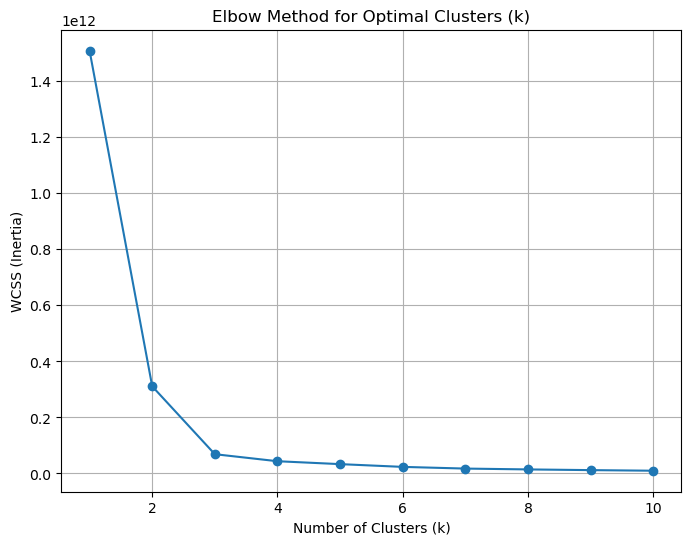

In [73]:
# Determine Optimal Number of Clusters using the Elbow Method

# This block ensures the code below only runs when the script is executed directly
if __name__ == '__main__':
    # A list to store the inertia (WCSS) values for each number of clusters
    wcss = []

    # Test K-Means with a range of cluster numbers (from 1 to 10)
    for i in range(1, 11):
        # Create a K-Means model with 'i' clusters and a specific random state for reproducibility
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        
        # Fit the model to the data
        kmeans.fit(X)
        
        # Add the inertia (the WCSS value) to our list
        wcss.append(kmeans.inertia_)

    # Plot the results to find the "elbow" point
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.grid(True)
    plt.show()

In [27]:
# Apply K-Means Clustering with 3 Clusters

# Initialize the KMeans model with:
# - n_clusters=3: We want to divide the data into 3 distinct clusters
# - init='k-means++': Improves the initialization of centroids for faster convergence
# - random_state=42: Ensures reproducibility of results

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the model to the feature data and assign each point to a cluster
# The result is an array indicating the cluster label (0, 1, or 2) for each data point
y_kmeans = kmeans.fit_predict(X)



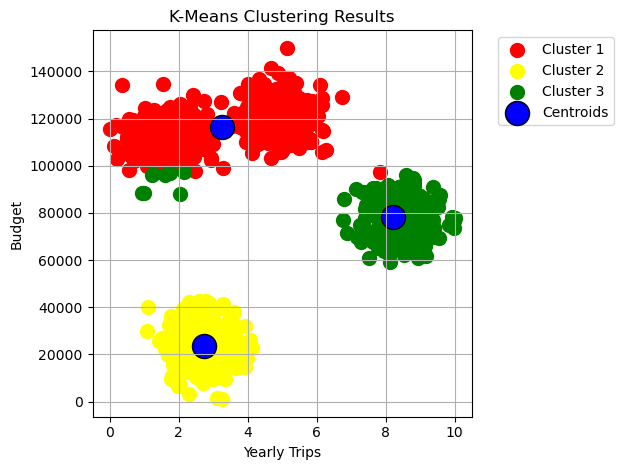

In [28]:
# Visualize K-Means Clusters and Their Centroids

# Define custom colors and labels for each cluster
colors = ['red', 'yellow', 'green']             # Color for each cluster
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']  # Human-readable labels

# Convert the feature DataFrame to a NumPy array for indexing
X_array = X.values

# Plot each data point, grouped by its assigned cluster
for i in range(3):  # Loop through the 3 clusters
    plt.scatter(
        X_array[y_kmeans == i, 0],    # X-axis: yearly_trips
        X_array[y_kmeans == i, 1],    # Y-axis: budget
        s=100,                        # Marker size
        c=colors[i],                  # Cluster-specific color
        label=labels[i]               # Cluster label in legend
    )

# Plot the centroids of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],   # X-coordinates of centroids
    kmeans.cluster_centers_[:, 1],   # Y-coordinates of centroids
    s=300,                           # Centroid marker size
    c='blue',                        # Centroid color
    label='Centroids',               # Legend label
    edgecolors='black'               # Add border to highlight centroids
)

# Add plot details
plt.title('K-Means Clustering Results')         # Plot title
plt.xlabel('Yearly Trips')                      # X-axis label
plt.ylabel('Budget')                            # Y-axis label
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend positioning
plt.grid(True)
plt.tight_layout()
plt.show()


This plot displays the clusters formed by the K-Means algorithm based on yearly trips and budget. Each color represents a distinct customer group, 
and the blue markers indicate the cluster centroids.

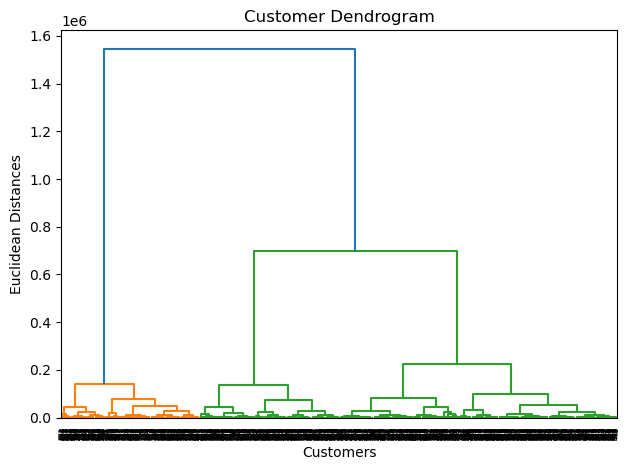

In [30]:
# Create a Dendrogram for Hierarchical Clustering

# Generate the linkage matrix using Ward's method, which minimizes the variance within clusters
# 'ward' is ideal for producing compact, spherical clusters similar to those in K-Means
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Plot the dendrogram to visualize the hierarchical clustering structure
# This helps determine the optimal number of clusters by identifying the largest vertical gaps
plt.title('Customer Dendrogram')           # Chart title
plt.xlabel('Customers')                    # X-axis: Index of customers (or observations)
plt.ylabel('Euclidean Distances')          # Y-axis: Distance between merged clusters
plt.tight_layout()
plt.show()


The dendrogram depicts how consumers are organised hierarchically according to their similarity (Euclidean distance). 
The longest vertical line not crossed by any horizontal line is frequently used to 
determine the appropriate number of clusters.

In [32]:
# Apply Agglomerative Hierarchical Clustering

# Initialize the Agglomerative Clustering model with:
# - n_clusters=3: Specifies the desired number of clusters
# - linkage='ward': Uses Ward's method to minimize variance within each cluster during merging
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the data and predict cluster assignments
# This assigns each observation to one of the 3 hierarchical clusters
y_hc = hc.fit_predict(X)


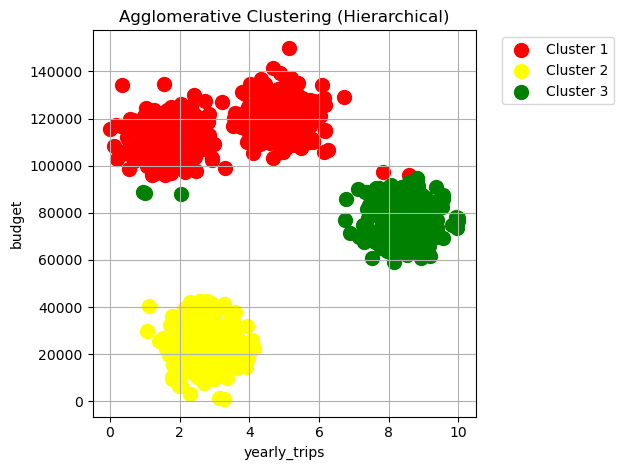

In [33]:
# Convert the DataFrame X to a NumPy array for easier slicing in plotting
X_array = X.to_numpy()

# Define distinct colors and labels for each of the 3 clusters
colors = ['red', 'yellow', 'green']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Loop through each cluster index and plot the points belonging to that cluster
for i in range(3):
    plt.scatter(
        X_array[y_hc == i, 0],  # X-axis values for cluster i (yearly_trips)
        X_array[y_hc == i, 1],  # Y-axis values for cluster i (budget)
        s=100,                  # Marker size
        c=colors[i],            # Marker color for cluster i
        label=labels[i]         # Label for cluster legend
    )

# Add plot title and axis labels for clarity
plt.title('Agglomerative Clustering (Hierarchical)')
plt.xlabel('yearly_trips')
plt.ylabel('budget')

# Position the legend outside the plot area to avoid overlapping
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Enable grid for better readability and adjust layout for neatness
plt.grid(True)
plt.tight_layout()

# Display the final cluster scatter plot
plt.show()


## Clustering task - Discussion Part a

- Describe the preprocessing, implementation, and output of the K-Means clustering algorithm. 
- Discuss the performance of the clustering algorithm, highlighting strengths and weaknesses.


### Preprocessing of the K-Means clustering algorithm  
The yearly_trips and budget variables were chosen as input features for the preprocessing step in K-Means clustering. Feature scaling was used to ensure that these different-scaled features were given equal weight in the clustering process.

### Implementation 
The Elbow Method was used to determine the number of clusters, which is a visual representation of the Within-Cluster Sum of Squares (WCSS) plotted against the cluster count.  The resulting graph exhibited an obvious "elbow" at k=3, which was determined to be the ideal number of clusters for this analysis. Following that, a KMeans model was started with n_clusters=3 to divide the data into three unique categories. To boost convergence efficiency and speed, the centroids were smartly initialised using init='k-means++'. To verify that the results were repeatable, a random_state of 42 was used. The algorithm works by iteratively assigning each data point to the nearest centroid and recalculating the centroids as the mean of the allocated points until convergence is reached.  A scatter plot was used to visualise the final clusters, with three unique groupings labelled Cluster 1, Cluster 2, and Cluster 3, represented by red, yellow, and green colours, respectively.

### Output of the K-Means Clustering Algorithm
The K-Means clustering algorithm produces a segmentation of the business traveler dataset into various groups (clusters)  
based on the 'yearly_trips' and 'budget' variables, as seen in the scatter plot.
The graph displays three clusters depending on yearly_trips (X-axis) and budget (Y-axis):

 **Cluster 1 (Red):** High-budget travellers with a low to moderate trip frequency.

- Although this set of travelers may not travel frequently, but when they do, they have a large budget and prioritise luxury experiences.


**Cluster 2 (Yellow):** Low Budget travellers, Few Trips.

- This cluster represents a group of persons that have has limited travel demands and operates on a fixed budget.


**Cluster 3 (Green):** Moderate Budget travellers, High Trips

- This cluster consists of individuals who travel frequently and typically have a moderate, often fixed, travel allowance.


 **Centroids (blue):** It represent the average position of data points in each cluster and serve as a reference point for each group.

### Evaluation of the K-Means Clustering Algorithm  
This section assesses the K-Means clustering algorithm t, highlighting its strengths and weaknesses.

  **Strengths of the K-Means Clustering Algorithm**  
During this analysis, the K-Means algorithm exhibited several major strengths:
-  Effective Cluster Separation (k = 3): The "Elbow Method" graph clearly shows that the ideal number of clusters is k=3.  This data-driven decision enhances the algorithm's capacity to recognise natural and unique categories within the dataset.
   
 -  Clear and Interpretable Clusters: The resulting clusters, as shown in the scatter plot for 'yearly_trips' and 'budget', are well-separated with little overlap.  Their visual distinctiveness makes the output easy to analyse and communicate to corporate stakeholders, resulting in actionable insights.

 -  Utility for Strategy Development: Creating separate consumer groups allows for the development of specialised corporate strategies.  For example, different approaches can be designed for frequent flyers versus budget-conscious travellers to optimise marketing and service efforts.

- Scalability: K-Means can handle big datasets with ease.

**Weaknesses and limitations Of the K-Means Clustering Algorithm**  
Despite its strengths, K-Means also presents certain limitations that should be acknowledged:  
- Vulnerability to Noisy Data and Outliers: The presence of outliers (Such as, individuals with extremely high budgets) can dramatically skew the cluster centroids, lowering the overall quality and representativeness of the clusters.  In our scatterplot, some dispersion among the red points (Cluster 1) indicates the presence of a few outliers.

- Ignored features: In this analysis, the graph only displays two features (yearly_trips and budget) excluding other potentially informative features such as 'loyalty_score' or 'airline_choice_index' which could provide richer insights

- Assumption of Spherical and Equally Sized Clusters: K-Means assumes that clusters are spherical and have identical sizes.  This assumption may not always be valid in real-world data, which could lead to misclassification if clusters have different shapes, sizes, or densities.

-  K-Means is limited to defining clusters using straight-line (linear) boundaries.  This feature may not adequately capture more complex, non-linear relationships or structures within the data.

 In Summary, The K-Means clustering method performed well for the given 2-Dimentional visualisation, displaying separate consumer groupings depending on travel frequency and budget.  However, ignoring other aspects and scaling issues may limit its practical application.  Refinements such as multi-feature clustering, normalisation, and different methods may offer more detailed insights.

## Clustering task - Discussion Part b

- Describe the preprocessing, implementation, and output of the Agglomerative Hierarchical clustering algorithm. 
- Discuss the performance of the clustering algorithm, highlighting strengths and weaknesses.


### Agglomerative Hierarchical Clustering
**Preprocessing**  
The model's inputs for Agglomerative Hierarchical Clustering were yearly_trips and budget characteristics.  Feature scaling was then applied to these variables to normalise their values, which is an important step for this technique, especially when the features have varied scales.

**Implementation**  
Implementation of Agglomerative  Hierarchical clustering starts with the creation of a dendrogram to visualise the data's hierarchical structure.  
This procedure depicts how clusters are generated by combining data points into bigger clusters based on similarity, specifically Euclidean distance.  The largest vertical distance in the dendrogram that was not crossed by a horizontal line was used to determine the appropriate number of clusters.  This analysis revealed that the data is hierarchically structured, allowing for the retrieval of three separate clusters.  
Following that, an AgglomerativeClustering model was created with n_clusters=3 and linkage='ward', a mechanism used to reduce variation inside each cluster during merging.
The model was then fitted to the data, assigning each observation to one of three groups.  Finally, the resulting clusters were visualised using a scatterplot.


**Output of the Agglomerative Hierarchical Clustering Algorithm**  
The Agglomerative Hierarchical Clustering Algorithm graphic depicts the resulting groups after using agglomerative clustering with k=3:
X-axis: yearly_trips and Y axis: budget.

- **Cluster 1 (Red):** High-budget, low-frequency travelers.

- **Cluster 2 (Yellow):** Low-budget, low-frequency travelers.

- **Cluster 3 (Green):** Moderate-to-high budget, high-frequency travelers.

**Performance of the Agglomerative Hierarchical  clustering algorithm, highlighting strengths and weaknesses.**  
The Agglomerative Hierarchical Clustering algorithm is a common unsupervised learning technique that creates layered clusters by gradually merging or separating them.  Based on the provided dendrogram and cluster plot (using annual_trips and budget), we can evaluate its performance as follows:

 **Strengths**
 - The dendrogram gives a visual reference for selecting the optimum number of clusters by spotting major vertical gaps in linkage height.
   
 - Captures Hierarchical Relationships: It provides a multi-level view of data structure, which is useful for understanding how different customer groups are related or nested.

 - Handles outliers slightly better.  While not immune from outliers, hierarchical clustering is less affected by initial anomalies than centroid-based approaches.

**Weaknesses**
- No Reversibility: Once two points or clusters have been merged, they cannot be divided again, even if the outcome is undesirable.

-  Lacks Centroid Interpretability: Unlike K-Means, hierarchical clustering does not yield centroids, making it more difficult to generalise and characterise clusters using average values.

- Computationally intensive: Hierarchical clustering is slower and less scalable than K-Means, particularly on large datasets.


In summary, Agglomerative Hierarchical Clustering is ideal for exploratory analysis, particularly when:

- The dataset is relatively small to medium-sized.
- You wish to understand the hierarchical relationships between clusters or
- You require visually driven segmentation (e.g., dendrogram).
However, its processing complexity and restricted flexibility make it unsuitable for large-scale, production-level clustering.  Methods such as K-Means may be more practical for business applications requiring speed, interpretability, and scalability, although hierarchical clustering is a great complimentary tool for validation and deeper insight.



## Clustering task - Discussion Part c

- Compare the performance of the two clustering algorithms: Which one yields clearer business insights or more stable clusters? Justify your choice.
- Based on your preferred clustering algorithm, describe the resulting clusters. Provide a clear label for each cluster, explain its key characteristics, and suggest a relevant strategy for engaging it.

**Comparison between K-Means and Agglomerative Hierarchical Clustering**  
Both K-Means and Agglomerative Hierarchical Clustering were used on the same Business Travel Segmentation dataset with the same variables (yearly_trips and budget) and produced similar cluster grouping results. However, there are differences in methodology, adaptability, and business value. Below is a side-by-side comparison:    
**1. Clarity of Business Insights**  
Both K-Means and Agglomerative Hierarchical Clustering proved effective in generating clear and actionable business insights, resulting in a tie in this category.
- Cluster Visualisation: K-Means generated tidy, spherical clusters with clearly defined centroids. Agglomerative Hierarchical Clustering provided similar visual clarity, with slightly higher overlap between clusters.
-  K-Means has great interpretability because its centroids directly indicate "average customer" categories.  Agglomerative Hierarchical Clustering, despite missing explicit centroids, produced intuitive groupings, contributing to reasonable interpretability.
-  Actionable Segments: Most importantly, both algorithms identified identical, equally significant, and well-defined actionable segments.  These divisions were consistently classified as red (VIP clients), yellow (budget-conscious), and green (regular travellers).

**2. Cluster Stability and Consistency:**  
Agglomerative Hierarchical Clustering outperformed in terms of cluster stability and consistency due to its inherent nature.
- K-Means results may vary slightly due to centroids' random initialisation.  In contrast, Agglomerative Hierarchical Clustering is deterministic, which means that the findings are consistent across several runs because there is no chance.
- K-Means had a higher sensitivity to noise and was more affected by outliers.  In contrast, Agglomerative Hierarchical Clustering was found to be more resistant to minor variations in the data.
- Scalability: K-Means is well-known for its ability to process big datasets quickly and efficiently.  Agglomerative Hierarchical Clustering, on the other hand, is typically slower for large datasets due to computational complexity.

**3. Flexibility and Practical Use**  
K-Means wins in terms of flexibility and usability because of its superior scalability and suitability for dynamic or real-time segmentation.
- Ease of Scaling: K-Means is highly scalable, making it appropriate for huge datasets.  Agglomerative Hierarchical Clustering is computationally expensive, especially when dealing with large amounts of data.
- Choosing Cluster Number: The best number of clusters for K-Means must be determined using methods such as the Elbow Method or Silhouette analysis.  With Agglomerative Hierarchical Clustering, the dendrogram serves as a visual aid, making cluster number selection more intuitive.
- Dynamic Segmentation: K-Means' flat cluster structure provides less flexibility for dynamic segmentation.  In contrast, Agglomerative Hierarchical Clustering is more adaptable due to its hierarchical nesting, which allows for varied levels of granularity in segmentation.

### Overall Recommendation

### K-Means for Business Insight Delivery
Overall, I recommend K-Means for delivering business insights.
I believe that K-Means is the finest algorithm for providing business insights.  The reasons for this recommendations are as follows:
- Ease of Profiling: K-Means' centroid-based segmentation makes it extremely simple to generalise and create a profile for each customer category.  The centroids provide a clear depiction of the "average" consumer, which is extremely useful for company communication and strategy.

- Scalability and Speed: K-Means is a faster and more practical approach for large-scale commercial applications that require maximum efficiency.

- Visual Clarity: The algorithm produced a slightly cleaner visual separation of clusters in scatter plots, increasing the clarity of the analysis.


### The Value of Agglomerative Hierarchical Clustering (AHC)
 While K-Means is our top recommendation for day-to-day operations, Agglomerative Hierarchical Clustering (AHC) is a useful supplement.  It is especially beneficial in the cases below:

- Initial Exploratory Analysis: AHC is ideal for the early stages of a project, assisting in understanding the underlying structure and nested relationships within the data.

- Validation and Deeper Insight: It can be used to confirm the optimal number of clusters found by K-Means and to acquire a more detailed, hierarchical understanding of customer interactions.

**To summarise my findings:**

- K-Means is used for making day-to-day business segmentation and operational decisions.  It is the most practical option due to its speed, scalability, and ease of interpretation.

- Agglomerative Hierarchical Clustering is useful for determining the number of clusters and gaining a better understanding of customer relationships.  This gives strong validation and a more detailed context for the segmentation.

 By integrating the characteristics of both algorithms, we can accomplish both rapid, actionable segmentation for operational usage and a more in-depth, stable understanding of our consumer base.

 




Based on the comparison, K-Means is the preferable clustering method due to its scalability, clear centroid-based grouping, and ease of interpretation—all of which make it ideal for developing business strategies.

 Using K-Means with three clusters, we get the following customer categories based on yearly_trips and budget:

**Cluster 1(Red): Premium Infrequent Travelers**

**Key Features:**
- Low travel frequency (1-4 trips annually)
- High annual budget ($100,000-140,000).
- Probably executive-level professionals or VIPs

**Strategy:**
- To cater for this segment, we should focus on offering luxury travel packages, exclusive VIP loyalty programs, and personalized premium concierge services. The emphasis should be on comfort, exclusivity, and convenience. 
- Provide exclusive loyalty programs by offering early access to exclusive offerings and tiered reward tiers.
  

**Cluster 2(Yellow): Budget-Conscious Occasional Travelers**

**Key Features:**
- Low to moderate travel frequency (1–4 trips per year)
- Low annual budget ($10,000-$40,000).
- Potentially small business owners, freelancers, or early-career professionals.

**Strategy:**

- Promote affordability by bundling economy flights with mid-range hotels and offering off-peak pricing.
- Provide value-based loyalty programs by offering discounts for a particular number of reservations or referrals.
- Provide Self-service support includeing mobile booking apps, budget tracking tools, and price alerts.
- Relationship management: Assign dedicated account managers for tailored support.

**Cluster 3: Frequent Value-Focused Travelers**

**Key features:**
- Frequent travel (6-10+ trips/year)
- Budget: Moderate to high ($70,000-$90,000).
- Probably field-based professionals, consultants, or project managers

**Strategy:**
- Efficiency and convenience: quick check-in/check-out services, loyalty rewards for frequent use.
- Flexible booking options: allow easy changes and cancellations.
- Targeted engagement: use data to recommend repeat destinations, hotel chains, or travel bundles.

In Conclusion, the K-Means clustering has clearly identified three distinct consumer kinds, each requiring a unique engagement strategy.  Using these insights, travel-related businesses may optimise marketing, increase client retention, and better allocate resources.



## Additional part

- Apply PCA to reduce dimensionality and simplify the dataset. Evaluate how much variance is retained.
- Visualise and interpret the feature loadings of the principal components.
- Re-run your preferred clustering method using the PCA-reduced data. Visualise the new clusters.

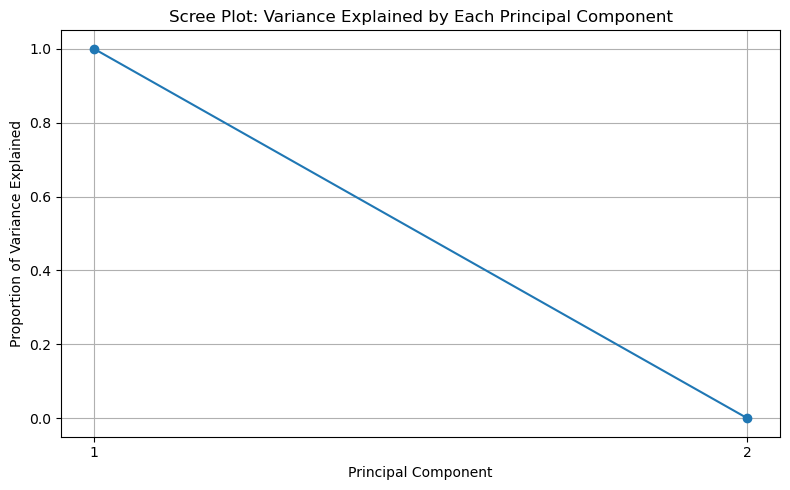

In [42]:
# Analyse how many components you should compute
# Select the features for analysis
X_cluster = dataset_cluster[['yearly_trips', 'budget', 'loyalty_score', 'airline_choice_index', 'hotel_preference_score']]

# Standardize the data to ensure all features are on a similar scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Perform PCA on the standardized data without limiting the number of components
# This is to find out how much variance each component explains
pca_full = PCA()
pca_full.fit(X)

# Get the proportion of variance explained by each component
explained_variance_ratio = pca_full.explained_variance_ratio_
components = np.arange(1, len(explained_variance_ratio) + 1)

# Create a scree plot to visualize the explained variance
plt.figure(figsize=(8, 5))
# Plot the variance explained by each principal component
plt.plot(components, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

# Set the x-axis ticks to match the number of components
plt.xticks(components)
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# Apply PCA with the number of components selected

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


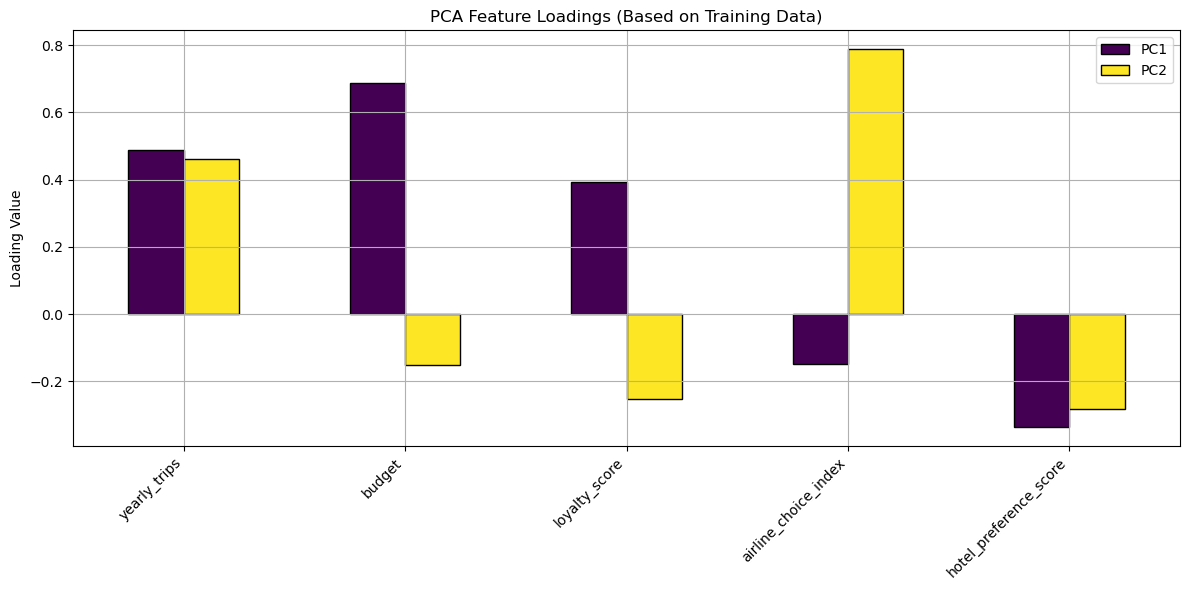

In [44]:
# Display how the original features contribute to the new components produced
# Select the features to analyze
X_cluster = dataset_cluster[['yearly_trips', 'budget', 'loyalty_score', 'airline_choice_index', 'hotel_preference_score']]

# Normalize the data so each feature has a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Create a PCA model
pca = PCA()

# Fit the PCA model to our scaled data
pca.fit(X_scaled)

# List the names of our original features
feature_names = ['yearly_trips', 'budget', 'loyalty_score', 'airline_choice_index', 'hotel_preference_score']

# Get the loading scores for the first two principal components (PC1 and PC2)
loadings = pca.components_.T[:, :2]
pca_loadings = pd.DataFrame(loadings, index=feature_names, columns=['PC1', 'PC2'])

# Create a bar chart to visualize the loading scores
pca_loadings.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('PCA Feature Loadings (Based on Training Data)')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

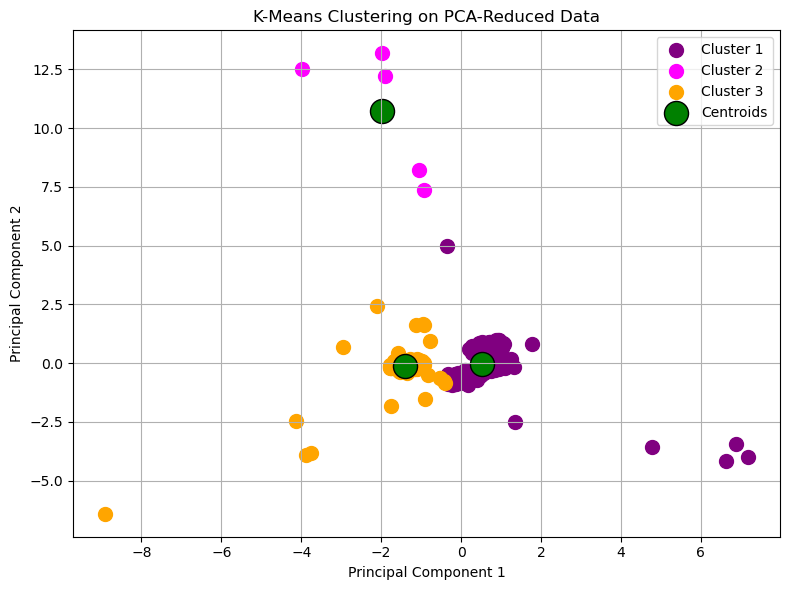

In [45]:
# Re-run the clustering algorithm selected
# Perform PCA to reduce data to 2 components
pca = PCA(n_components=2)
# Apply the PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering to the new, reduced data
# We'll group the data into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X_pca)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))

# Plot data points for each of the 3 clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='magenta', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='orange', label='Cluster 3')

# Plot the center of each cluster (the centroid)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='green', label='Centroids', edgecolors='black')

# Add titles and labels for clarity
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Additional part - Discussion

- Discuss how the components produced through PCA relate to the original dataset.
- Compare the clustering outcome from PCA-reduced data to your earlier clustering. Are the groups similar? Why or why not? 


### How PCA Components Reflect the Original Data Structure
Based on the cluster dataset and the use of Principal Component Analysis (PCA) with two components, the transformation reduces the dataset's dimensionality while maintaining as much variation as possible. PCA operates by determining the directions (principal components) in which the data fluctuates the most and projecting it along those axes.

In this scenario, the original dataset includes several quantitative features such as yearly_trips, budget, lead_time_days, loyalty_score, airline_choice_index, and hotel_preference_score. Using PCA, these variables were linearly integrated into Principal Component 1 (PC1) and Principal Component 2 (PC2).  These components are not directly related to individual features, but rather represent the weighted contributions of all original variables.
PC1 often captures the majority of the variance in the data, and is most frequently influenced by highly variable fields such as budget or loyalty_score.  PC2 explains the second-largest share of variance, and it may capture patterns that are orthogonal to those in PC1, such as differences in travel behaviour or preference consistency.
PCA streamlines the clustering process by condensing intricate associations, however interpretability is diminished when compared to using original features.  This aids in identifying discrete client categories and visualising the overall structure of the data, particularly when charting PC1 and PC2.











### Comparison of Clustering Outcomes: PCA-Reduced Data vs. K-Means on Original Clustering Data
The clustering results using PCA-reduced data and the original K-Means clustering are not identical, and several key distinctions explains why:

When K-Means clustering is used on the original dataset with the variables yearly_trips and budget, the resulting clusters are well-separated, compact, and easily interpretable.  Each cluster corresponds to specific consumer types, such as low-frequency high-budget travellers, low-budget travellers, and regular travellers with moderate budgets.  These clusters are not only physically different, but they are also intimately linked to relevant business data, increasing their strategic worth.
In comparison, clustering using PCA-reduced data reveals greater overlap and dispersion among clusters.  The centroids are closer together, and the boundaries between groups are less clear.  This is because PCA converts the data into new principal components that maximise variance but do not always preserve the clustering pattern of the original features.  As a result, while the algorithm still detects three clusters, their composition and interpretability are unclear.
The variation in outcomes is mostly attributable on the nature of PCA.  It decreases dimensionality by merging characteristics into uncorrelated components, which might occasionally obscure the original correlations between variables that are critical for effective clustering. In this situation, the initial dataset was already low dimensional, with only two meaningful variables, therefore using PCA added little value and degraded the clarity of the clustering findings.
In conclusion, K-Means clusters on original data are more distinct and easier to read than PCA-reduced clusters. As a result, while the number of clusters remains constant, the group structures alter, and clustering on the original data produces more meaningful and actionable segmentation.